# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Cici Yuriza
- Email: ciciyuriza999@gmail.com
- Id Dicoding: yuriza

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from joblib import dump, load
from sklearn.metrics import accuracy_score, confusion_matrix

### Menyiapkan data yang akan diguankan

## Data Understanding

In [2]:
# set maximum display column
pd.set_option('display.max_columns', None)

In [3]:
# read csv into dataframe
df = pd.read_csv('data.csv',delimiter=';')

# show information columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [4]:
# show 5 first data
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
# calculate missing value
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [6]:
# calculate duplicated data
df.duplicated().sum()

0

In [7]:
# show describe
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Insight :
-   Total data 4424 baris dan 37 kolom
-   Tidak ada missing value
-   Tidak ada data terduplikat

## Exploratory Data Analysis

In [8]:
# Menghitung jumlah student berdasarkan status
df.Status.value_counts()

Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [9]:
# Pisahkan student yang berstatus Enrolled, untuk selanjutnya di prediksi meggunakan model machine learning
df_enrolled = df[df.Status=='Enrolled']
df = df[~(df.Status=='Enrolled')]

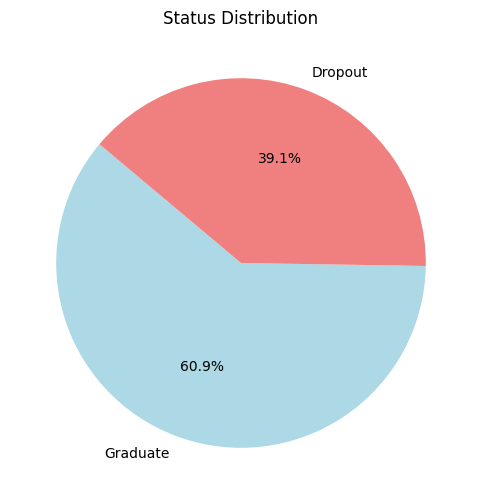

In [10]:
# Menghitung Persentase Status

# Counting the occurrences of each status
status_counts = df['Status'].value_counts()

# Creating the pie chart with specified colors
colors = ['lightblue', 'lightcoral']
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Status Distribution')
plt.show()


Insight :
-   Student dropout mencapai **39.1%**.

In [11]:
categorical_columns = [
    'Marital_status', 'Application_mode', 'Course',
    'Daytime_evening_attendance', 'Previous_qualification',
    'Nacionality','Mothers_qualification', 'Fathers_qualification',
    'Mothers_occupation', 'Fathers_occupation','Displaced',
    'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date',
    'Gender', 'Scholarship_holder', 'International'
]

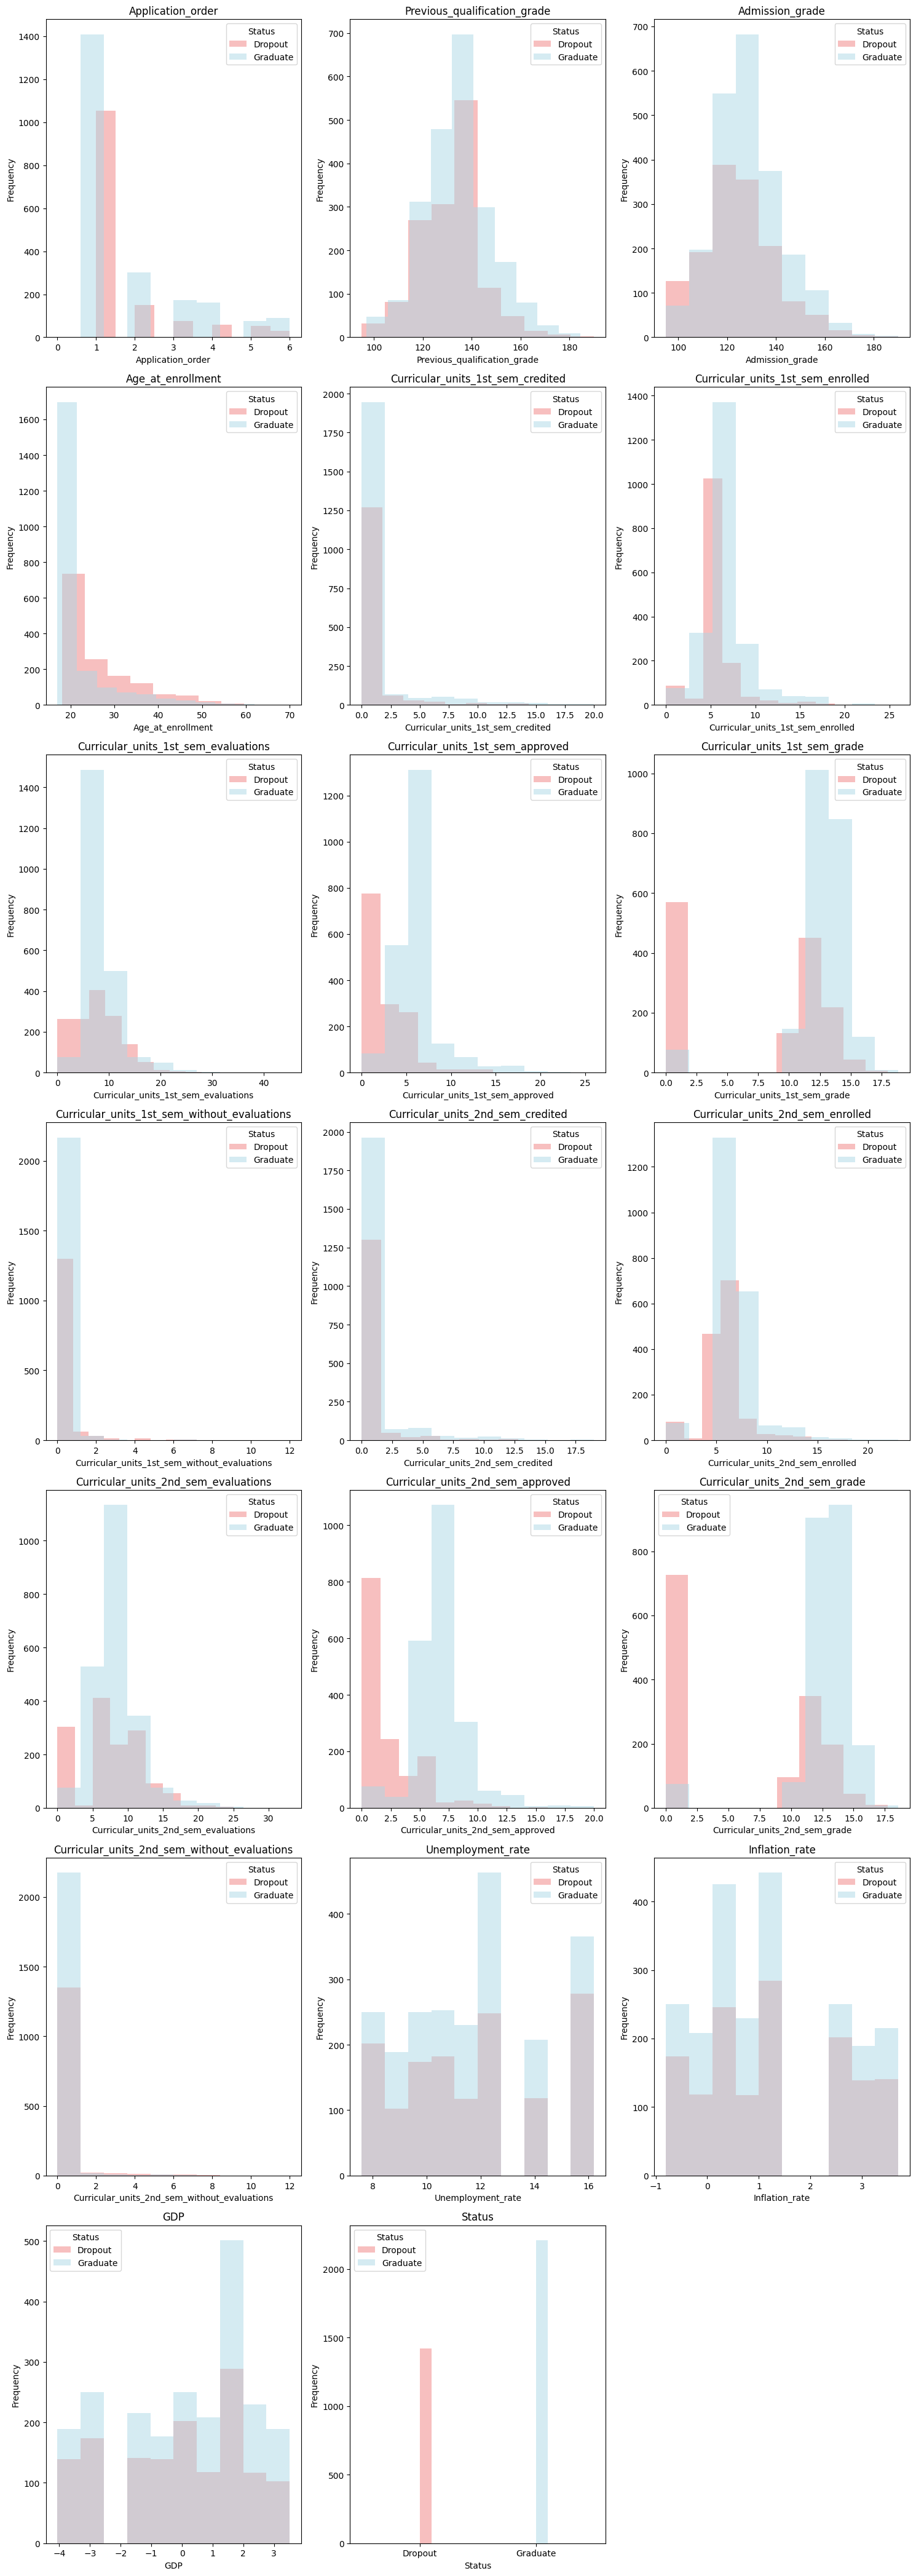

In [12]:
# Identifying numeric columns (int and float)
numeric_columns = df.drop(columns=categorical_columns).columns


# Number of columns for the subplot grid
num_cols = 3
num_rows = -(-len(numeric_columns) // num_cols)  # Ceiling division

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop melalui setiap kolom numerik
for i, column in enumerate(numeric_columns):
    ax = axes[i]
    for status in df['Status'].unique():
        subset = df[df['Status'] == status]
        color = 'lightblue' if status == 'Graduate' else 'lightcoral'
        ax.hist(subset[column], bins=10, alpha=0.5, label=status, color=color)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'{column}')
    ax.legend(title='Status')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

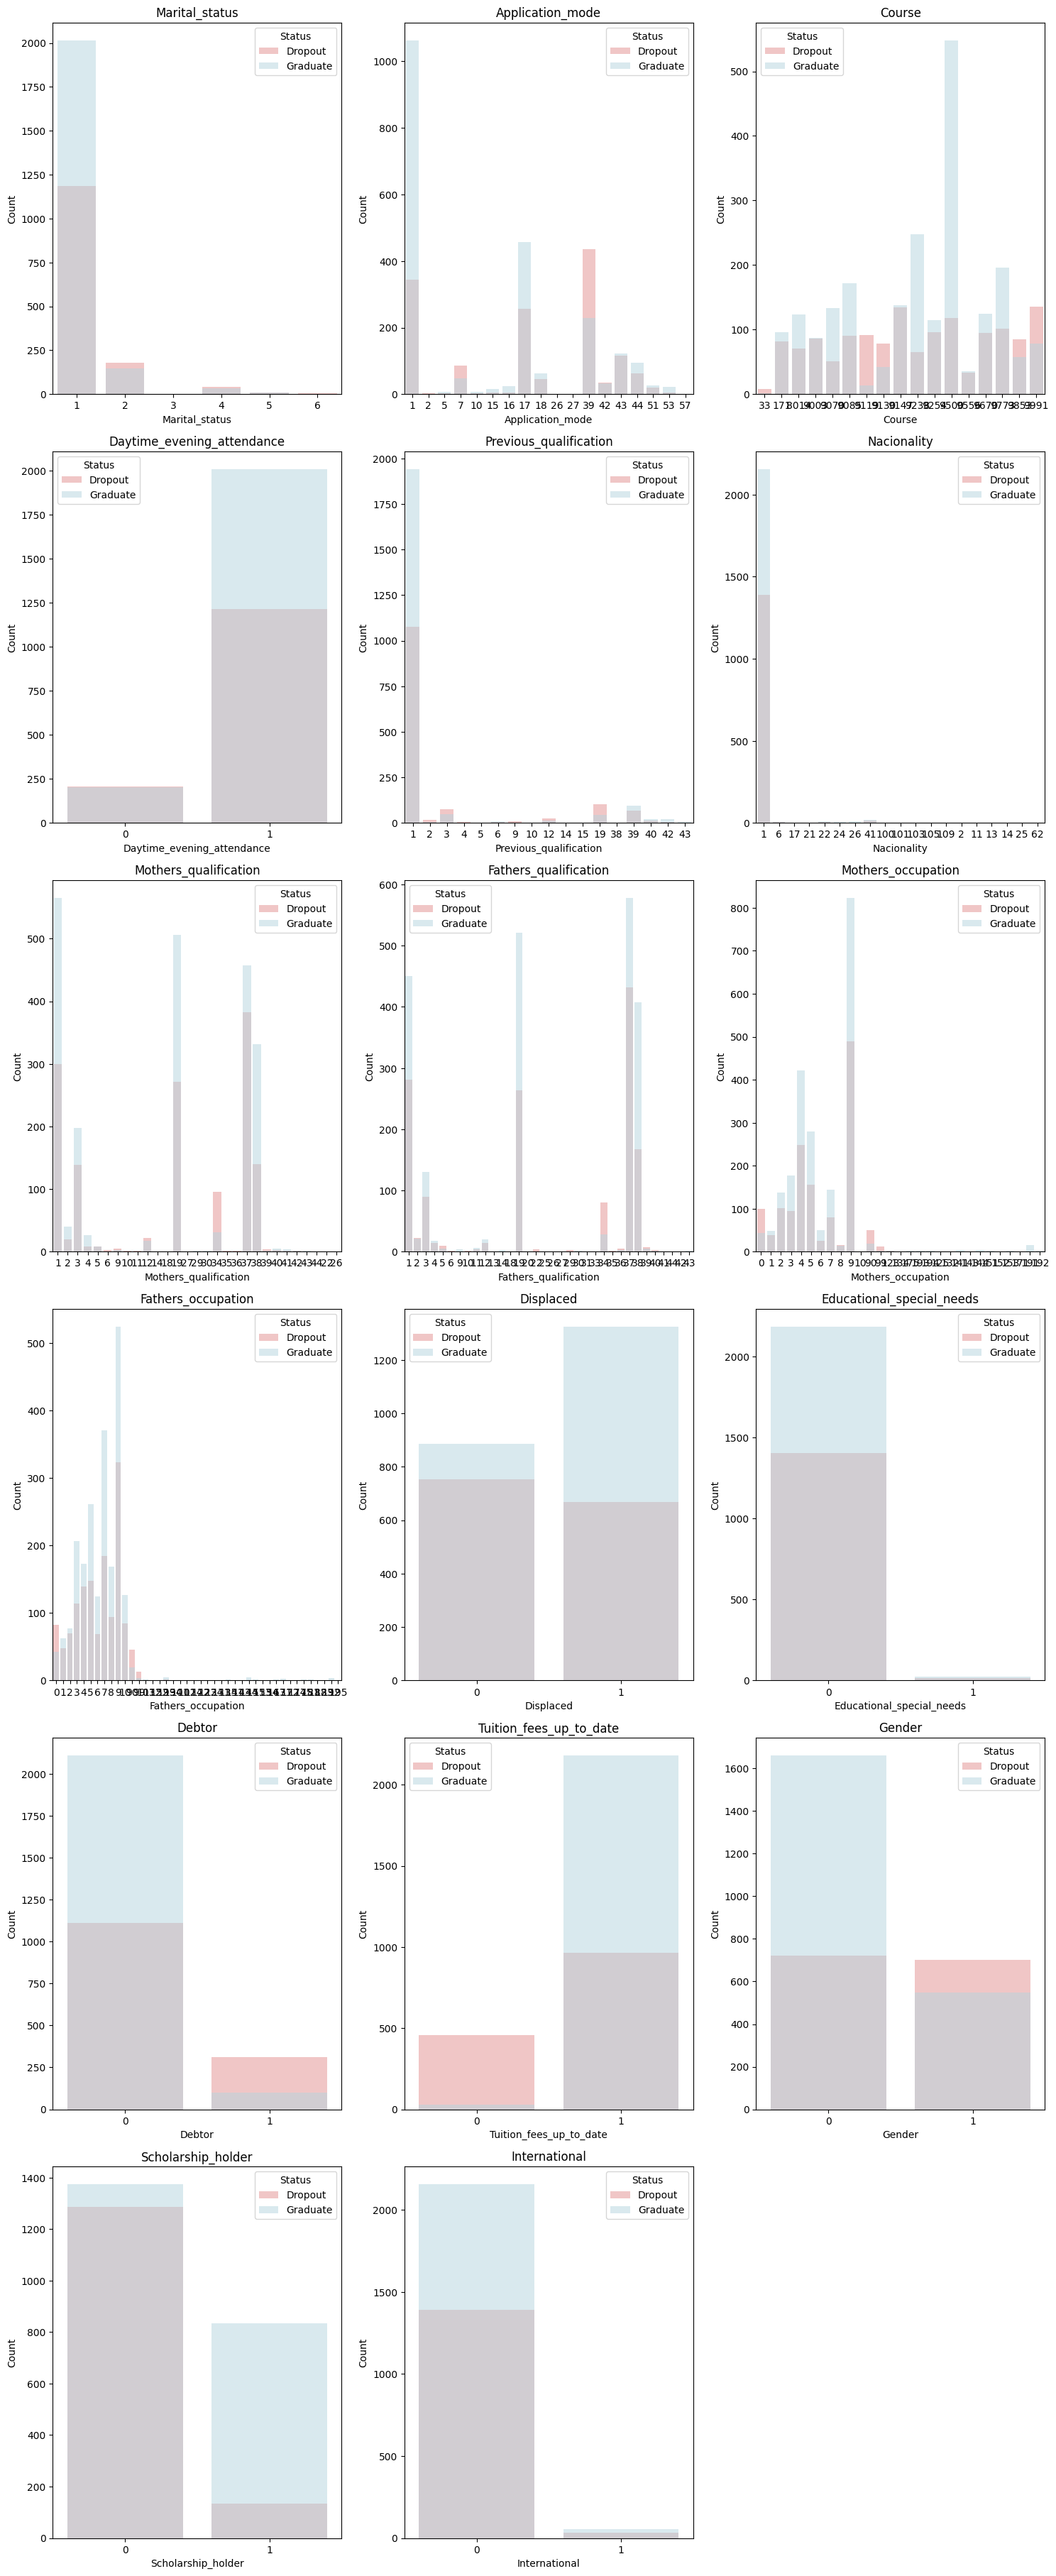

In [13]:
# Membuat palet warna kustom
custom_palette = {'Graduate': 'lightblue', 'Dropout': 'lightcoral'}

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop melalui setiap kolom kategorikal
for i, column in enumerate(categorical_columns):
    for status in df['Status'].unique():
        subset = df[df['Status'] == status]
        ax = axes[i]
        sns.countplot(x=column, data=subset, hue='Status',alpha=0.5, palette=custom_palette, ax=ax)
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_title(f'{column}')
        ax.legend(title='Status')

# Remove empty subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Data Preparation / Preprocessing

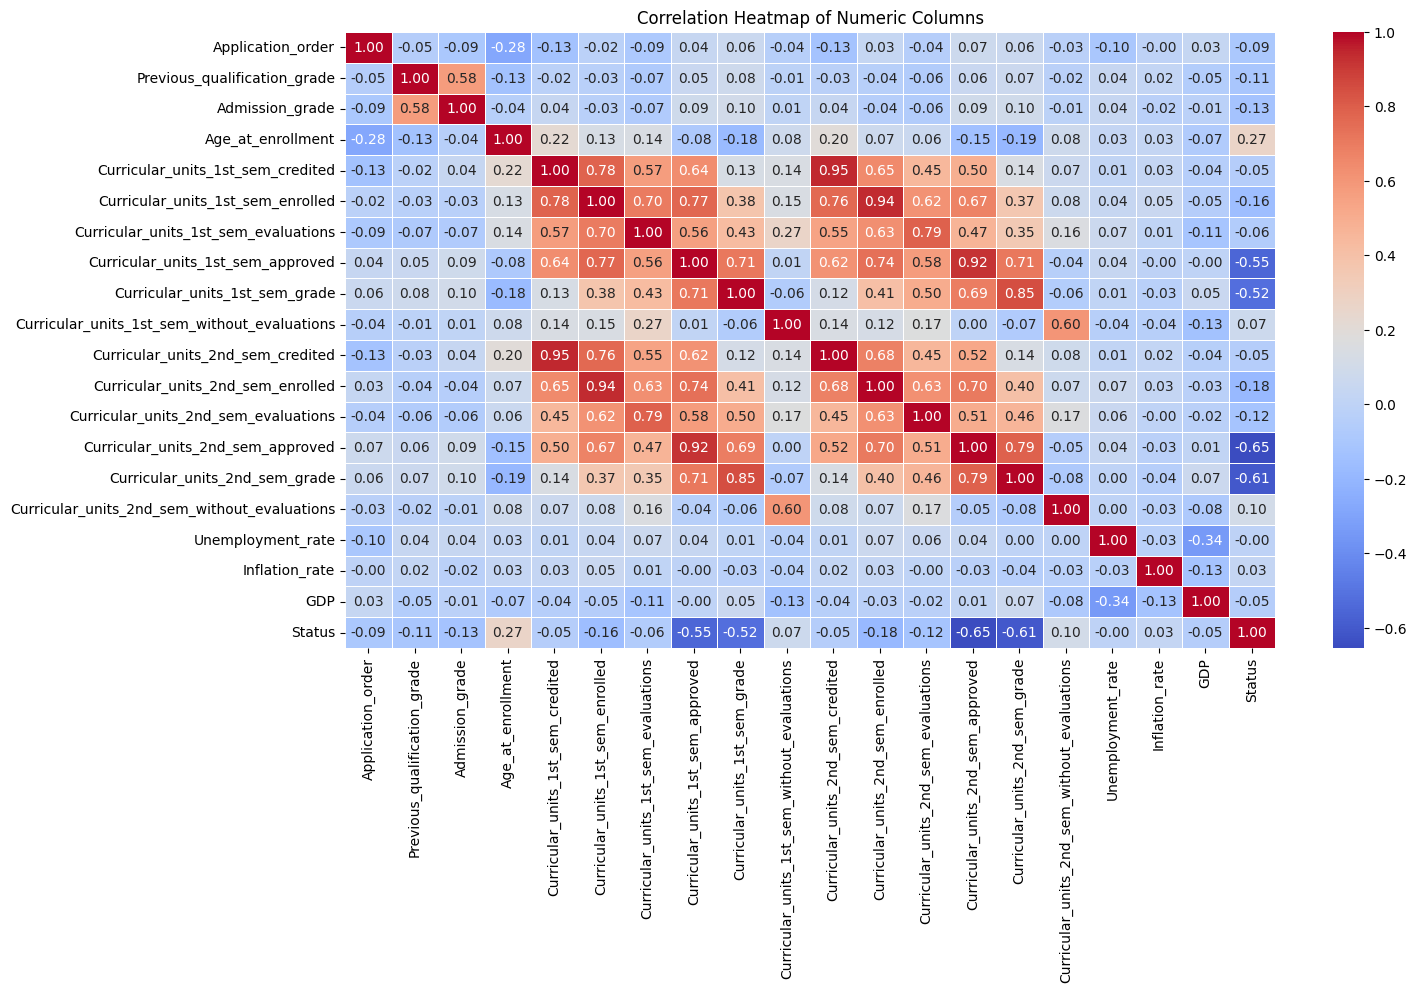

In [14]:
# Mengganti nilai 'Graduate' dengan 0 dan 'Dropout' dengan 1 dalam kolom 'Status'
df['Status'] = df['Status'].replace({'Graduate': 0, 'Dropout': 1})

# Calculating the correlation matrix
correlation_matrix = df.drop(columns=categorical_columns).corr()

# Creating the heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [15]:
deleted_columns =["Unemployment_rate",
                  "GDP", "Inflation_rate", "Curricular_units_2nd_sem_evaluations",
                  "Curricular_units_2nd_sem_without_evaluations",
                  "Curricular_units_1st_sem_without_evaluations",
                  "Curricular_units_1st_sem_evaluations",
                  "Educational_special_needs","International", "Course", "Application_mode",
                  "Nacionality", "Mothers_qualification", "Fathers_qualification",
                  "Mothers_occupation", "Fathers_occupation", 'Marital_status','Age_at_enrollment',
                  "Previous_qualification"
]

In [16]:
df_train = df.drop(columns=deleted_columns)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Application_order                  3630 non-null   int64  
 1   Daytime_evening_attendance         3630 non-null   int64  
 2   Previous_qualification_grade       3630 non-null   float64
 3   Admission_grade                    3630 non-null   float64
 4   Displaced                          3630 non-null   int64  
 5   Debtor                             3630 non-null   int64  
 6   Tuition_fees_up_to_date            3630 non-null   int64  
 7   Gender                             3630 non-null   int64  
 8   Scholarship_holder                 3630 non-null   int64  
 9   Curricular_units_1st_sem_credited  3630 non-null   int64  
 10  Curricular_units_1st_sem_enrolled  3630 non-null   int64  
 11  Curricular_units_1st_sem_approved  3630 non-null   int64  
 1

## Modeling

In [32]:
# Split features and target variable
X = df_train.drop('Status', axis=1)
y = df_train['Status']

# Define categorical features
numerical_features = ['Application_order','Previous_qualification_grade','Admission_grade',
                      'Curricular_units_1st_sem_enrolled','Curricular_units_2nd_sem_enrolled',
                      'Curricular_units_1st_sem_credited','Curricular_units_2nd_sem_credited',
                      'Curricular_units_1st_sem_approved','Curricular_units_2nd_sem_approved',
                      'Curricular_units_1st_sem_grade','Curricular_units_2nd_sem_grade']
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

# Create Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', rf_classifier)
])


# Define parameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict on test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save best model
dump(best_model.named_steps['classifier'], 'best_trained_model.pkl')

# Save encoder for standard scaler
dump(best_model.named_steps['preprocessor'].named_transformers_['scaler'], 'best_standard_scaler.pkl')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Accuracy: 0.9022038567493113


['best_standard_scaler.pkl']

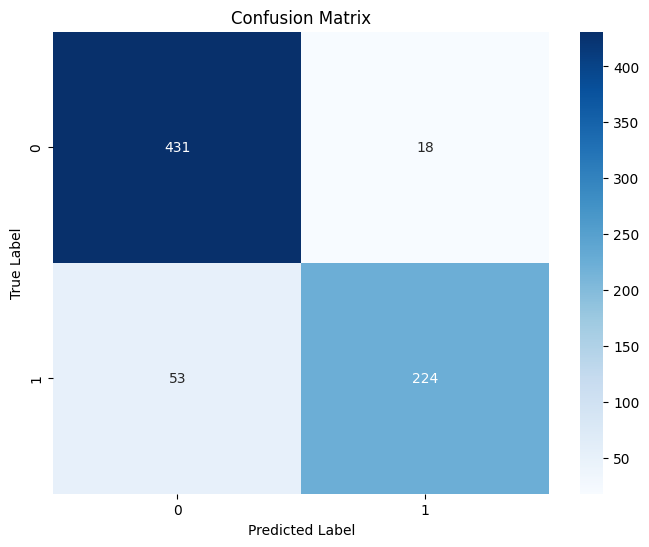

In [70]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=best_model.named_steps['classifier'].classes_, yticklabels=best_model.named_steps['classifier'].classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Evaluation

In [35]:
# Load model and encoder
model = load('best_trained_model.pkl')
standard_scaler = load('best_standard_scaler.pkl')

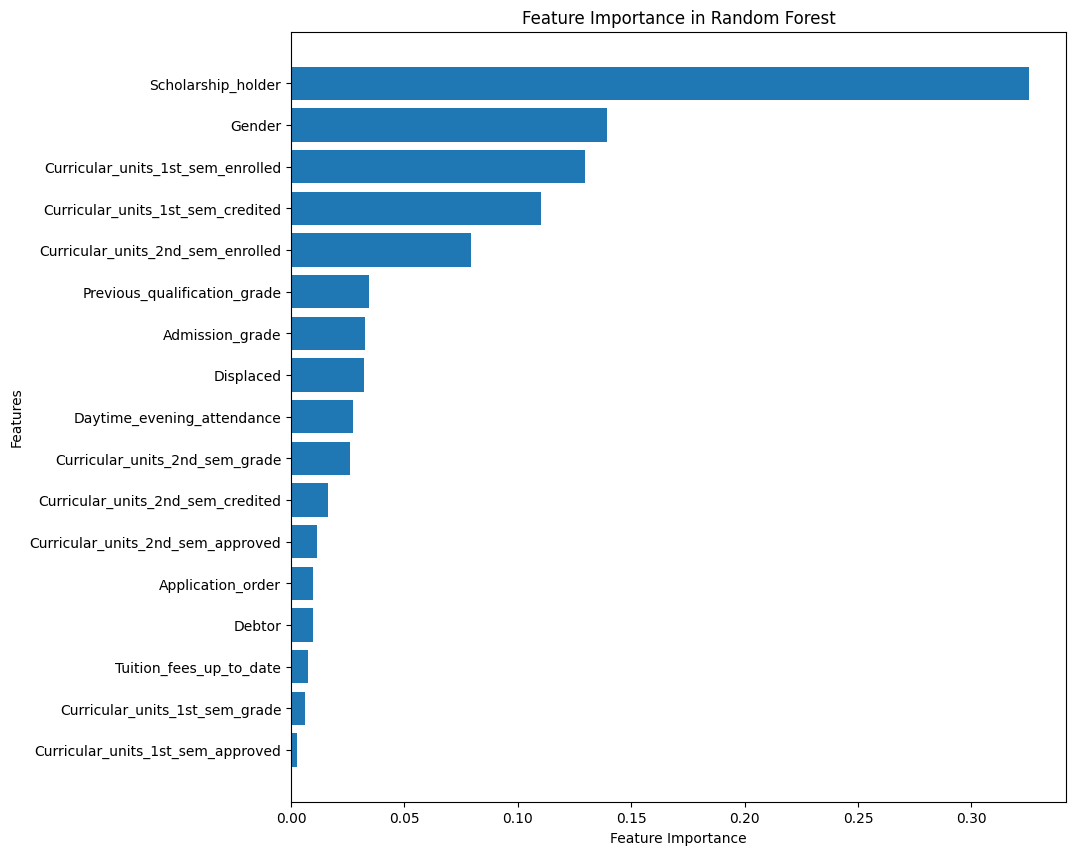

In [36]:
# Menampilkan feature importance
feature_importances = model.feature_importances_
features = X.columns

# Membuat DataFrame untuk feature importance
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Mengurutkan berdasarkan importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Menampilkan plot
plt.figure(figsize=(10, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()

In [37]:
# ambil sepuluh fitur penting
# Mengurutkan berdasarkan importance dan ambil 10 fitur penting pertama
top_10_features = importance_df.nlargest(10, 'Importance')

# Menampilkan 10 fitur penting
print(top_10_features)

                              Feature  Importance
8                  Scholarship_holder    0.325458
7                              Gender    0.139249
10  Curricular_units_1st_sem_enrolled    0.129829
9   Curricular_units_1st_sem_credited    0.110305
14  Curricular_units_2nd_sem_enrolled    0.079476
2        Previous_qualification_grade    0.034566
3                     Admission_grade    0.032516
4                           Displaced    0.032092
1          Daytime_evening_attendance    0.027355
16     Curricular_units_2nd_sem_grade    0.025885


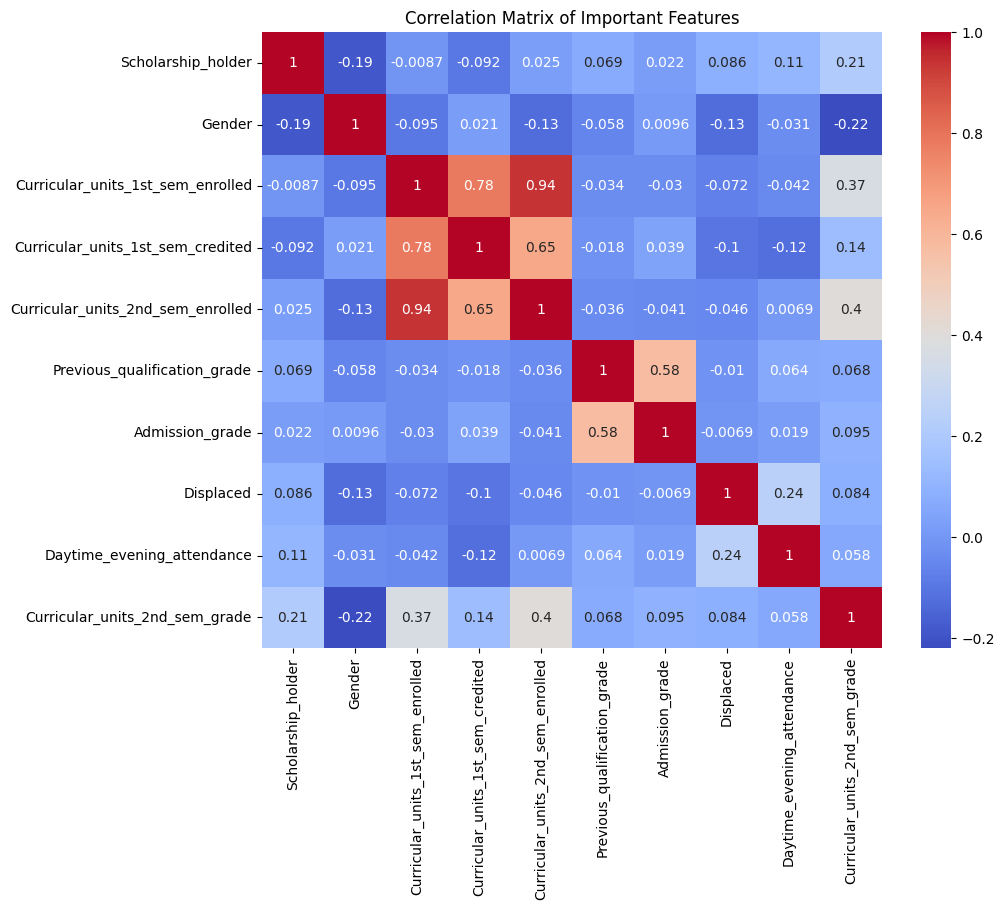

In [38]:
# Hitung matriks korelasi untuk fitur-fitur penting
correlation_matrix = df_train[top_10_features['Feature']].corr()

# Visualisasikan matriks korelasi menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Important Features')
plt.show()

In [52]:
df_enrolled = df_enrolled.reset_index(drop=True)

# Define categorical and numerical features
numerical_features = ['Application_order', 'Previous_qualification_grade', 'Admission_grade',
                      'Curricular_units_1st_sem_enrolled', 'Curricular_units_2nd_sem_enrolled',
                      'Curricular_units_1st_sem_credited', 'Curricular_units_2nd_sem_credited',
                      'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_approved',
                      'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade']

# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', standard_scaler, numerical_features)
    ],
    remainder='passthrough'
)

# Add the preprocessor and model to the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Fit preprocessor to df_enrolled (assuming this is necessary for standard scaler)
pipeline.named_steps['preprocessor'].fit(df_enrolled.drop(deleted_columns + ['Status'], axis=1))

# Preprocess and predict using df_enrolled
y_pred_test = pipeline.predict(df_enrolled.drop(deleted_columns + ['Status'], axis=1))

# Get true labels from df_enrolled
df_enrolled['Status'] = y_pred_test

In [53]:
df_enrolled.Status.value_counts()

Status
0    438
1    356
Name: count, dtype: int64

In [69]:
# Concatenate df_train and df_enrolled to create df_final
df_final = pd.concat([df_train, df_enrolled.drop(deleted_columns,axis=1)], ignore_index=True)

# Verify the shape of df_final to ensure the concatenation was successful
print("Shape of df_final:", df_final.shape)

# Optionally, save df_final to a CSV file
df_final.to_csv('df_final.csv', index=False)

Shape of df_final: (4424, 18)
